<a href="https://colab.research.google.com/github/KrishnaSChavan/MachineLearning/blob/main/feature_extraction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/KrishnaSChavan/MachineLearning/main/functions.py

--2023-06-21 13:59:53--  https://raw.githubusercontent.com/KrishnaSChavan/MachineLearning/main/functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘functions.py’

functions.py        100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-21 13:59:53 (73.3 MB/s) - ‘functions.py’ saved [10246/10246]



In [4]:
from functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import time
import pandas as pd
from tqdm import tqdm
from tensorflow.keras import layers

In [5]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-06-21 14:15:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.103.128, 108.177.121.128, 108.177.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.103.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   176MB/s    in 0.9s    

2023-06-21 14:15:58 (176 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [6]:
unzip_data('/content/10_food_classes_10_percent.zip')

In [8]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

# Model 1

In [16]:
train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

In [17]:
IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir,
    image_size=IMAGE_SHAPE,
    label_mode = 'categorical',
    batch_size=BATCH_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir,
    image_size=IMAGE_SHAPE,
    label_mode= 'categorical',
    batch_size=BATCH_SIZE
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [19]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [21]:
np.unique(train_data.class_names)

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [23]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

input = tf.keras.Input(shape=(224,224,3))

x = base_model(input)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

output = tf.keras.layers.Dense(10,activation='softmax')(x)

model = tf.keras.Model(inputs = input,outputs = output)


In [39]:
count = 0
for x in base_model.layers:
    print(x.name)
    count +=1
print(count)

input_3
rescaling_2
normalization_1
rescaling_3
stem_conv_pad
stem_conv
stem_bn
stem_activation
block1a_dwconv
block1a_bn
block1a_activation
block1a_se_squeeze
block1a_se_reshape
block1a_se_reduce
block1a_se_expand
block1a_se_excite
block1a_project_conv
block1a_project_bn
block2a_expand_conv
block2a_expand_bn
block2a_expand_activation
block2a_dwconv_pad
block2a_dwconv
block2a_bn
block2a_activation
block2a_se_squeeze
block2a_se_reshape
block2a_se_reduce
block2a_se_expand
block2a_se_excite
block2a_project_conv
block2a_project_bn
block2b_expand_conv
block2b_expand_bn
block2b_expand_activation
block2b_dwconv
block2b_bn
block2b_activation
block2b_se_squeeze
block2b_se_reshape
block2b_se_reduce
block2b_se_expand
block2b_se_excite
block2b_project_conv
block2b_project_bn
block2b_drop
block2b_add
block3a_expand_conv
block3a_expand_bn
block3a_expand_activation
block3a_dwconv_pad
block3a_dwconv
block3a_bn
block3a_activation
block3a_se_squeeze
block3a_se_reshape
block3a_se_reduce
block3a_se_expand

In [24]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [31]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [32]:
history_1 = model.fit(
    train_data,
    epochs = 5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.25*len(test_data)),
    callbacks=[create_tensorboard_callback("tf","10_per")]

)

Saving TensorBoard log files to: tf/10_per/20230621-145612
Epoch 1/5
24/24 [==============================] - 14s 240ms/step - loss: 0.7973 - accuracy: 0.8027 - val_loss: 0.6134 - val_accuracy: 0.8651
Epoch 2/5
24/24 [==============================] - 4s 154ms/step - loss: 0.6058 - accuracy: 0.8533 - val_loss: 0.4852 - val_accuracy: 0.9030
Epoch 3/5
24/24 [==============================] - 5s 182ms/step - loss: 0.4967 - accuracy: 0.8880 - val_loss: 0.4087 - val_accuracy: 0.9178
Epoch 4/5
24/24 [==============================] - 5s 181ms/step - loss: 0.4187 - accuracy: 0.9080 - val_loss: 0.3596 - val_accuracy: 0.9227
Epoch 5/5
24/24 [==============================] - 5s 201ms/step - loss: 0.3766 - accuracy: 0.9293 - val_loss: 0.3116 - val_accuracy: 0.9424


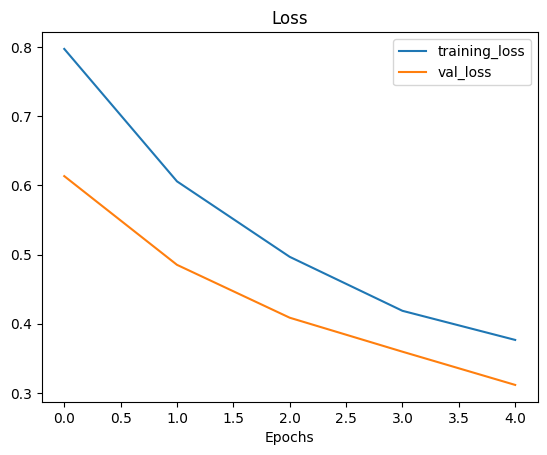

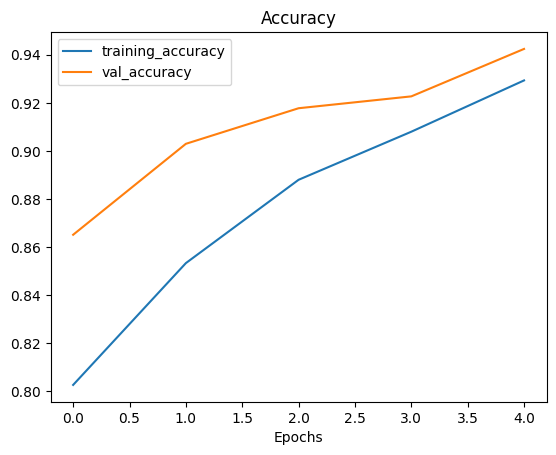

In [40]:
plot_loss_curves(history_1)